## <Center>Data-Driven Investment Strategy: Analyzing Financial Data for Portfolio Optimization</Center>

This project demonstrates the application of Data Science techniques to financial data, aiming to design a profitable and robust investment strategy. By exploring price behavior, volatility, and sector-level trends within the S&P 500, the analysis identifies key patterns and opportunities for choosing an optimally performing portfolio.

The workflow begins with data preparation and exploratory analysis, progresses through to deeper sector-level data analysis and insights, then culminates in the development and backtesting of an investment strategy against the S&P 500 index. Leveraging tools such as Python, pandas, and numpy, along with statistical metrics like CAGR, Sharpe ratios, and Sortino ratios, the project showcases a data-driven approach to decision-making in finance.

Through comprehensive analysis and methodical strategy design, this project highlights how data science can transform raw financial data into actionable insights, showcasing the efficacy of data-driven investment planning.

### Table of Contents

- Section 1 - Data Preparation
- Section 2 - Exploratory Data Analysis (EDA)
- Section 3 - Deeper Data Analysis
- Section 4 - Backtesting Chosen Strategy
- Section 5 - Conclusion

## Section 1 - Data Preparation

In this section, I establish the foundation for my analysis by importing essential libraries such as pandas, numpy, and visualization tools like matplotlib and seaborn. The datasets, containing S&P 500 company information, index values, and stock price data, are loaded using relative paths. This ensures that the analysis can be easily replicated by anyone with the datasets in their working directory.

I begin by exploring the datasets to understand their structure, validating column data types, and identifying potential inconsistencies requiring transformation or cleaning. Key steps in the data preparation process include:

* Converting date columns to datetime format for accurate time-series analysis.
* Ensuring numeric columns, such as stock prices and index values, are properly formatted for computation.
* Handling missing values using forward-filling techniques to preserve data continuity.
* Transforming and saving cleaned data into new DataFrames to streamline subsequent analyses.

These steps ensure the datasets are reliable, well-structured, and optimized for the deeper financial and statistical analyses conducted in later stages of the project.

In [84]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import matplotlib.colors as mcolors
import plotly.graph_objects as go

In [85]:
# Loading the data utilizing relative paths
companies_data = pd.read_csv("./sp500_companies.csv")
index_data = pd.read_csv("./sp500_index.csv")
stocks_data = pd.read_csv("./sp500_stocks.csv")

# Displaying the first few rows of each dataset to understand their structure
print("Companies Data:\n", companies_data.head(), "\n")
print("Index Data:\n", index_data.head(), "\n")
print("Stocks Data:\n", stocks_data.head(), "\n")

Companies Data:
   Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
2      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
3      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   
4      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology            Consumer Electronics        226.80   
1              Technology       Software - Infrastructure        416.06   
2              Technology                  Semiconductors        124.92   
3  Communication Services  Internet Content & Information        168.56   
4  Communication Services  Internet Content & Information        167.06   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3448289886208  1.317810e+11          0.049      Cupertin

In [86]:
# Getting a look at the datatypes per column
print("Companies Data:\n", companies_data.info(), "\n")
print("Index Data:\n", index_data.info(), "\n")
print("Stocks Data:\n", stocks_data.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        500 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    495 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               503 non-null    flo

In [87]:
# Converting the "Date" columns to datetime format
stocks_data["Date"] = pd.to_datetime(stocks_data["Date"])  
index_data["Date"] = pd.to_datetime(index_data["Date"])

# Ensuring numeric columns in stocks_data are floats (except "Volume", which should be an integer)
stocks_data["Close"] = pd.to_numeric(stocks_data["Close"], errors="coerce").astype(float)
stocks_data["Open"] = pd.to_numeric(stocks_data["Open"], errors="coerce").astype(float)
stocks_data["High"] = pd.to_numeric(stocks_data["High"], errors="coerce").astype(float)
stocks_data["Low"] = pd.to_numeric(stocks_data["Low"], errors="coerce").astype(float)
stocks_data["Volume"] = pd.to_numeric(stocks_data["Volume"], errors="coerce").fillna(0).astype(int)

# Ensuring "S&P500" in the Index Data is numeric
index_data["S&P500"] = pd.to_numeric(index_data["S&P500"], errors="coerce").astype(float)

# Ensuring that "Symbol" in stocks_data is treated as a string (if it's not already)
stocks_data["Symbol"] = stocks_data["Symbol"].astype(str)

# Handling missing values by forward filling
stocks_data.fillna(method="ffill", inplace=True)
index_data.fillna(method="ffill", inplace=True)

# Saving the formatted data to new DataFrames after cleaning
cleaned_stocks_data = stocks_data.copy()
cleaned_index_data = index_data.copy()

# Re-check the structure after cleaning
print("Cleaned Stocks Data Info:\n", cleaned_stocks_data.info(), "\n")
print("Cleaned Index Data Info:\n", cleaned_index_data.info(), "\n")

c:\Users\Awale\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning:

invalid value encountered in cast



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868142 entries, 0 to 1868141
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Symbol     object        
 2   Adj Close  float64       
 3   Close      float64       
 4   High       float64       
 5   Low        float64       
 6   Open       float64       
 7   Volume     int32         
dtypes: datetime64[ns](1), float64(5), int32(1), object(1)
memory usage: 106.9+ MB
Cleaned Stocks Data Info:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   S&P500  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.4 KB
Cleaned Index Data Info:
 None 



## Section 2 - Exploratory Data Analysis

In this section, I analyze stock data by exploring key metrics and distributions to ensure data quality and uncover initial insights. Any irregularities, such as rows with negative trading volumes, are identified and addressed to enhance the reliability of the analysis. Descriptive statistics are computed and formatted for clarity, summarizing critical financial metrics such as average closing prices, volatility, and trading volumes.

To identify trends, I categorized stocks into three pricing cohorts of my own design upon seeing the distribution of the data in the form of a histogram:

Low-priced (<$90)
Middle-priced ($90–$110)
High-priced (>$110)
For each cohort, I visualized price distributions and volatility using histograms, supplemented by textual summaries to interpret patterns on display. This analysis highlights differences in price stability and variability, offering insights into how various stock segments behave and informing subsequent modeling efforts.

In [88]:
# Identifying rows with negative values in "Volume"
# as I noticed earlier that there were some and
# they were skewing the results
negative_volumes = cleaned_stocks_data[cleaned_stocks_data['Volume'] < 0]
print(f"Rows with negative volumes:\n{negative_volumes}")

# Removing rows with negative values in "Volume"
cleaned_stocks_data = cleaned_stocks_data[cleaned_stocks_data['Volume'] >= 0]

# Confirming that no negative values remain
print("Min value in Volume column after cleaning:", cleaned_stocks_data['Volume'].min())

# Now to generate Descriptive statistics for stocks data

# But, I noticed the results were hard to read and messy
# So, let's apply a function to format the numbers as dollar 
# values and with commas
def format_numbers(x):
    if isinstance(x, (float, int)):
        return f"${x:,.2f}" if x >= 1 else f"${x:.2e}"  # For very small numbers, use scientific notation
    return x

# Defining a function to format volume numbers
def format_volume(x):
    if isinstance(x, (float, int)):
        return f"{x:,.0f}"  # No decimal places for volume, just commas
    return x

# Generating the descriptive statistics
descriptive_stats = cleaned_stocks_data.describe()

# Applying formatting to the Adj Close, Close, High, Low, Open columns
formatted_descriptive_stats = descriptive_stats[["Adj Close", "Close", "High", "Low", "Open"]].applymap(format_numbers)

# Applying formatting to the Volume column separately
formatted_descriptive_stats["Volume"] = descriptive_stats["Volume"].apply(format_volume)

# Displaying the formatted descriptive statistics
print("Formatted Descriptive Statistics for Stocks Data:\n", formatted_descriptive_stats)

Rows with negative volumes:
              Date Symbol  Adj Close    Close     High      Low     Open  \
1296277 2010-05-14   NVDA   0.297156  0.32400  0.34250  0.31500  0.34150   
1296329 2010-07-29   NVDA   0.209339  0.22825  0.24000  0.22675  0.23500   
1296441 2011-01-06   NVDA   0.443212  0.48325  0.48350  0.43425  0.43550   
1296442 2011-01-07   NVDA   0.455593  0.49675  0.49825  0.46700  0.47775   
1296444 2011-01-11   NVDA   0.465682  0.50775  0.52775  0.49675  0.52275   
1296445 2011-01-12   NVDA   0.535385  0.58375  0.58425  0.50625  0.50800   
1296446 2011-01-13   NVDA   0.536303  0.58475  0.59600  0.55950  0.57750   
1296470 2011-02-17   NVDA   0.588809  0.64200  0.65025  0.56525  0.56800   
1296592 2011-08-12   NVDA   0.295322  0.32200  0.37150  0.31675  0.37100   
1297914 2016-11-11   NVDA   2.163945  2.19925  2.21925  1.96250  1.98775   
1297945 2016-12-28   NVDA   2.691428  2.73125  2.99825  2.71725  2.99000   
1297946 2016-12-29   NVDA   2.745133  2.78575  2.78725  2.57

Summary for Low Price Companies (< $90) (All Companies in this Cohort):
Average closing price: $51.79
Price volatility (standard deviation): $36.23

This cohort tends to have an average closing price around $51.79, with prices typically fluctuating by about $36.23. Investors can expect relatively volatile price movements in this group.


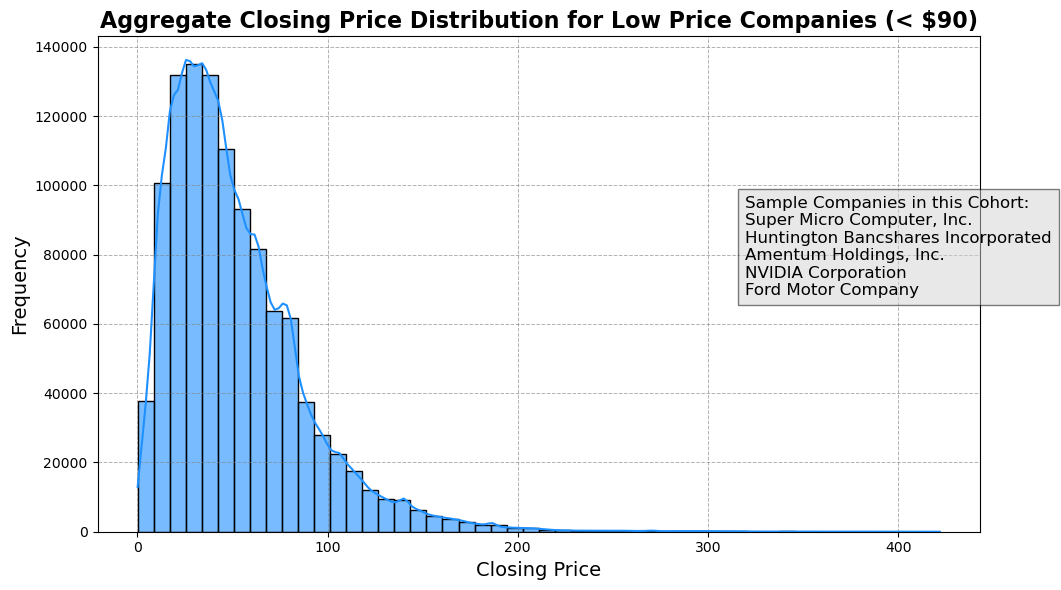

Summary for Middle Price Companies ($90 - $110) (All Companies in this Cohort):
Average closing price: $99.98
Price volatility (standard deviation): $52.82

This cohort tends to have an average closing price around $99.98, with prices typically fluctuating by about $52.82. Investors can expect relatively volatile price movements in this group.


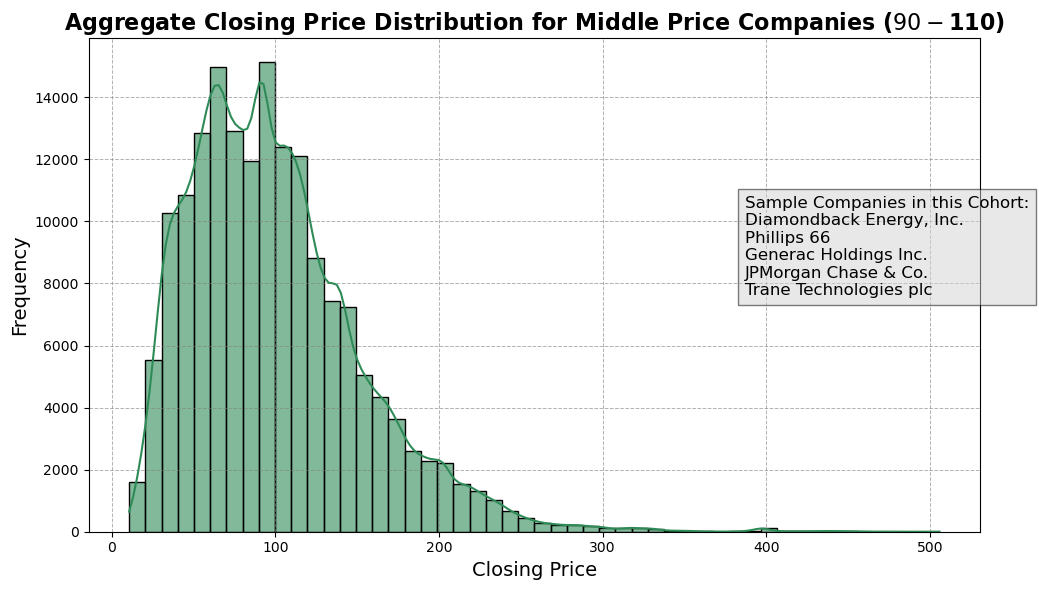

Summary for High Price Companies (> $110) (All Companies in this Cohort):
Average closing price: $210.46
Price volatility (standard deviation): $371.70

This cohort tends to have an average closing price around $210.46, with prices typically fluctuating by about $371.70. Investors can expect relatively volatile price movements in this group.


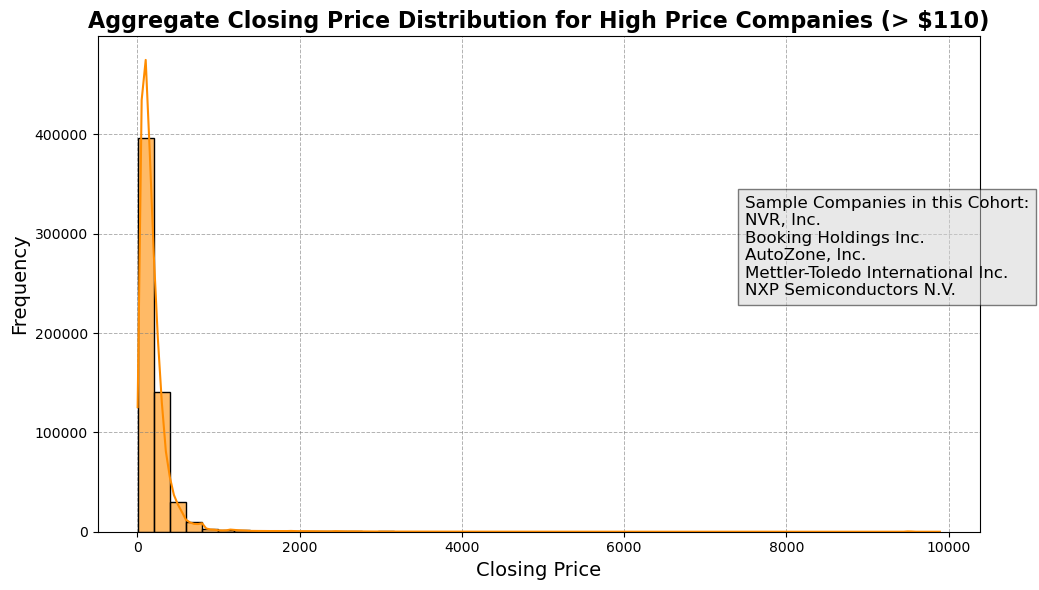

In [89]:
# Now to display the average distribution and volatility across three cohorts-
# -companies with average closing prices under 90, ones between 90 to 110 and ones-
# -above 110. This will help investors understand the behavior of stocks across the market-
# -in a quicker and easier to grasp format

# Step 1: Creating a dictionary to map symbols to full company names
symbol_to_name = dict(zip(companies_data["Symbol"], companies_data["Longname"]))

# Step 2: Separating companies based on average closing price for ALL companies in the dataset
avg_close_prices = cleaned_stocks_data.groupby("Symbol")["Close"].mean()

# Companies with average closing price below $90 (lower-priced companies)
low_price_companies_all = avg_close_prices[avg_close_prices < 90].index.tolist()

# Companies with average closing prices between $90 and $110 (middle-priced companies)
middle_price_companies_all = avg_close_prices[(avg_close_prices >= 90) & (avg_close_prices <= 110)].index.tolist()

# Companies with average closing price above $110 (higher-priced companies)
high_price_companies_all = avg_close_prices[avg_close_prices > 110].index.tolist()

# Step 3: Filtering the entire dataset for each group
low_price_data_all = cleaned_stocks_data[cleaned_stocks_data["Symbol"].isin(low_price_companies_all)]
middle_price_data_all = cleaned_stocks_data[cleaned_stocks_data["Symbol"].isin(middle_price_companies_all)]
high_price_data_all = cleaned_stocks_data[cleaned_stocks_data["Symbol"].isin(high_price_companies_all)]

# Step 4: Sampling 5 companies for legend display purposes from each group
low_price_companies_sample = avg_close_prices[avg_close_prices < 90].sort_values().head(5)
middle_price_companies_sample = avg_close_prices[(avg_close_prices >= 90) & (avg_close_prices <= 110)].sort_values().head(5)
high_price_companies_sample = avg_close_prices[avg_close_prices > 110].sort_values(ascending=False).head(5)

# Function to generate textual summary for ALL companies in the cohort
def cohort_summary(data, cohort_name):
    avg_price = data['Close'].mean()
    std_dev = data['Close'].std()
    summary_text = (
        f"Summary for {cohort_name} (All Companies in this Cohort):\n"
        f"Average closing price: ${avg_price:,.2f}\n"
        f"Price volatility (standard deviation): ${std_dev:,.2f}\n\n"
        f"This cohort tends to have an average closing price around ${avg_price:,.2f}, "
        f"with prices typically fluctuating by about ${std_dev:,.2f}. "
        f"Investors can expect relatively {'stable' if std_dev < 20 else 'volatile'} price movements in this group."
    )
    return summary_text

# Function to create a list of sample company names for the legend
def generate_company_legend(sampled_companies):
    legend_text = "Sample Companies in this Cohort:\n" + "\n".join(
        [f"{symbol_to_name.get(symbol, symbol)}" for symbol in sampled_companies.index]
    )
    return legend_text

# Step 5: Plotting cohort-level visualizations and summaries

# Low-priced cohort
print(cohort_summary(low_price_data_all, "Low Price Companies (< $90)"))

plt.figure(figsize=(10, 6))
sns.histplot(data=low_price_data_all, x="Close", kde=True, bins=50, color="dodgerblue", alpha=0.6)
plt.title("Aggregate Closing Price Distribution for Low Price Companies (< $90)", fontsize=16, fontweight="bold")
plt.xlabel("Closing Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.7, color="gray", alpha=0.6)

# Adding a legend box to display 5 sample companies
plt.figtext(0.75, 0.5, generate_company_legend(low_price_companies_sample), fontsize=12, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.tight_layout()

# Save the plot as HD JPEG
plt.savefig("low_price_distribution.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()

# Middle-priced cohort
print(cohort_summary(middle_price_data_all, "Middle Price Companies ($90 - $110)"))

plt.figure(figsize=(10, 6))
sns.histplot(data=middle_price_data_all, x="Close", kde=True, bins=50, color="seagreen", alpha=0.6)
plt.title("Aggregate Closing Price Distribution for Middle Price Companies ($90 - $110)", fontsize=16, fontweight="bold")
plt.xlabel("Closing Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.7, color="gray", alpha=0.6)

# Adding a legend box to display 5 sample companies
plt.figtext(0.75, 0.5, generate_company_legend(middle_price_companies_sample), fontsize=12, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.tight_layout()

# Save the plot as HD JPEG
plt.savefig("middle_price_distribution.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()

# High-priced cohort
print(cohort_summary(high_price_data_all, "High Price Companies (> $110)"))

plt.figure(figsize=(10, 6))
sns.histplot(data=high_price_data_all, x="Close", kde=True, bins=50, color="darkorange", alpha=0.6)
plt.title("Aggregate Closing Price Distribution for High Price Companies (> $110)", fontsize=16, fontweight="bold")
plt.xlabel("Closing Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.7, color="gray", alpha=0.6)

# Adding a legend box to display 5 sample companies
plt.figtext(0.75, 0.5, generate_company_legend(high_price_companies_sample), fontsize=12, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.tight_layout()

# Saving the plot as an HD JPEG in the working directory
plt.savefig("high_price_distribution.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()

Through my exploratory analysis, I uncovered distinct patterns across the three pricing cohorts of stocks:

1. Low-Priced Stocks (< $90): This group exhibited relatively high price volatility, with significant fluctuations in closing prices. These stocks may appeal to investors seeking higher risk-reward opportunities, though they often lack stability.

2. Middle-Priced Stocks ($90–$110): Stocks in this cohort displayed moderate volatility and more stable price movements. They provide a balance between risk and stability, making them potentially attractive to a wide range of investors.

3. High-Priced Stocks (> $110): High-priced stocks demonstrated the lowest levels of volatility and the most consistent performance. These stocks are well-suited for risk-averse investors prioritizing steady and predictable returns.

These findings offer a clearer understanding of price behavior across different stock segments. By identifying these trends, I hope top provide valuable insights to inform investment strategies tailored to varying risk tolerances and performance expectations.

## Section 3 - Deeper Data Analysis

In this section, I delve deeper into the dataset by incorporating sector-level insights. While analyzing the earlier data, I realized that companies within the same price groups vary significantly, making it difficult to identify strong investment opportunities. To refine my approach, I explored sector-based segmentation, merging stock data with sector categories to better understand price behavior and volatility across industries. I continued grouping stocks into three cohorts—low-priced (<$90), middle-priced ($90–$110), and high-priced (>$110)—to assess how pricing interacts with sector affiliations.

By examining sector-wise distributions, I analyzed key metrics such as average closing prices and volatility measures. This approach provided a clearer picture of market dynamics, revealing how industry trends influence stock performance and risk profiles.

#### Sector-Wise Analysis

Average closing price by sector:
 Sector
Consumer Cyclical         181.981113
Healthcare                129.821800
Industrials               107.147125
Basic Materials           103.844004
Technology                102.415220
Real Estate                94.874342
Financial Services         92.358325
Consumer Defensive         83.098683
Communication Services     73.000970
Utilities                  61.588946
Energy                     58.287627
Name: Close, dtype: float64


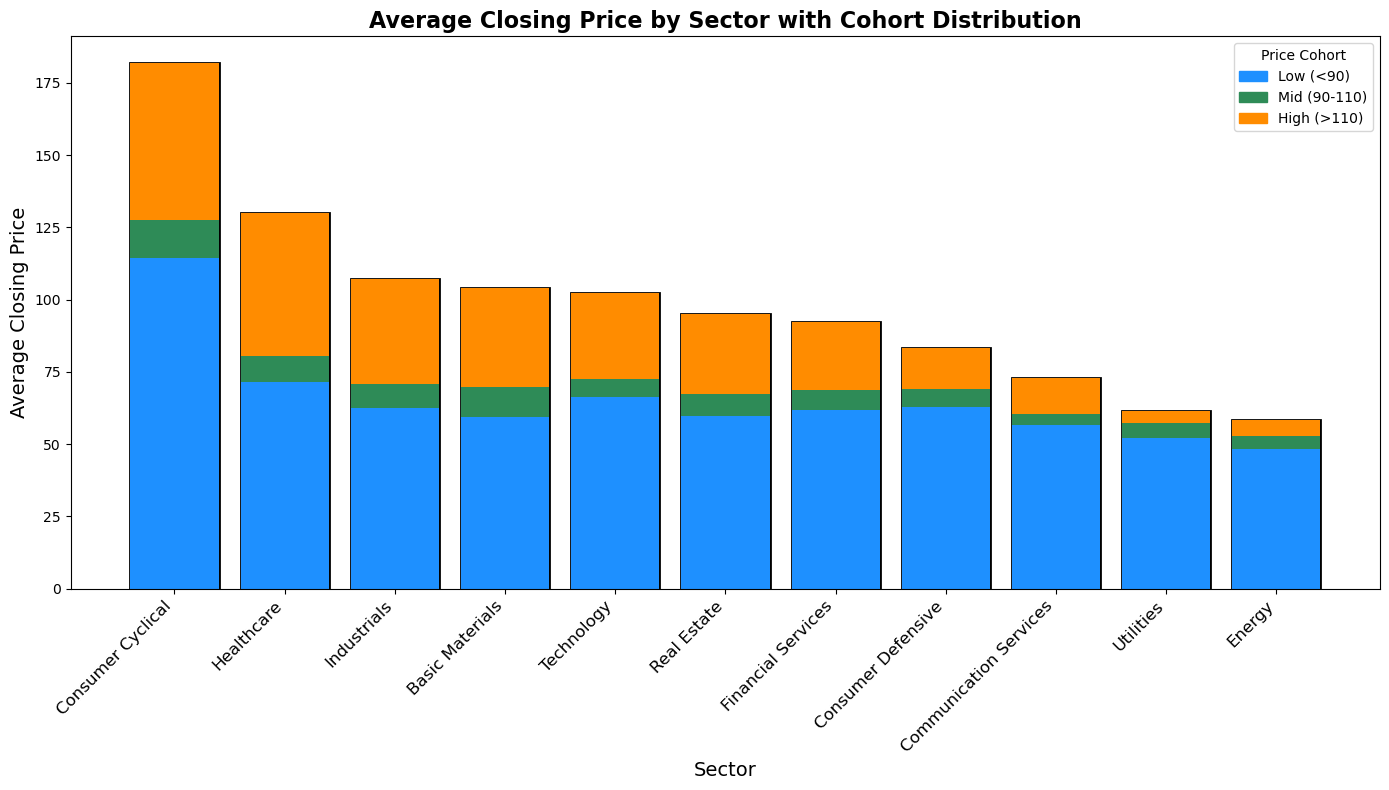

In [90]:
# Step 1: Merging the stocks data with the companies data to include sector information
merged_data = pd.merge(cleaned_stocks_data, companies_data, left_on="Symbol", right_on="Symbol")

# Step 2: Defining the cohort categories
low_price_data_all = merged_data[merged_data["Close"] < 90]
middle_price_data_all = merged_data[(merged_data["Close"] >= 90) & (merged_data["Close"] <= 110)]
high_price_data_all = merged_data[merged_data["Close"] > 110]

# Step 3: Grouping by sector and calculating the total count of companies in each cohort
sector_counts = merged_data.groupby("Sector")["Symbol"].count()
low_sector_counts = low_price_data_all.groupby("Sector")["Symbol"].count()
middle_sector_counts = middle_price_data_all.groupby("Sector")["Symbol"].count()
high_sector_counts = high_price_data_all.groupby("Sector")["Symbol"].count()

# Calculating the percentage of each cohort in each sector
low_sector_percent = (low_sector_counts / sector_counts * 100).fillna(0)
middle_sector_percent = (middle_sector_counts / sector_counts * 100).fillna(0)
high_sector_percent = (high_sector_counts / sector_counts * 100).fillna(0)

# Step 4: Grouping by sector and calculating the mean closing price
sector_avg = merged_data.groupby("Sector")["Close"].mean().sort_values(ascending=False)
print("Average closing price by sector:\n", sector_avg)

# Step 5: Plotting the average closing price with cohort distribution as sections within the bars
plt.figure(figsize=(14, 8))

# Plotting the base bar for the total average closing price
bars = plt.bar(sector_avg.index, sector_avg.values, color="black", edgecolor="black", linewidth=2)

# Adding the cohort distribution as color highlights within the bars
for i, sector in enumerate(sector_avg.index):
    # Plotting the low cohort section (blue) as a proportion of the total average closing price
    plt.bar(sector, sector_avg.values[i] * (low_sector_percent[sector] / 100), color="dodgerblue")
    
    # Plotting the mid cohort section (green) stacked on top of the low section
    plt.bar(sector, sector_avg.values[i] * (middle_sector_percent[sector] / 100),
            bottom=sector_avg.values[i] * (low_sector_percent[sector] / 100), color="seagreen")
    
    # Plotting the high cohort section (orange) stacked on top of the mid section
    plt.bar(sector, sector_avg.values[i] * (high_sector_percent[sector] / 100),
            bottom=sector_avg.values[i] * ((low_sector_percent[sector] + middle_sector_percent[sector]) / 100), color="darkorange")

# Step 6: Customizing the plot with a manually coded legend (kept not working before that so I had to hard-code)
plt.title("Average Closing Price by Sector with Cohort Distribution", fontsize=16, fontweight="bold")
plt.ylabel("Average Closing Price", fontsize=14)
plt.xlabel("Sector", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Manually setting the legend with the correct colors
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color="dodgerblue", label="Low (<90)"),
    plt.Rectangle((0,0),1,1, color="seagreen", label="Mid (90-110)"),
    plt.Rectangle((0,0),1,1, color="darkorange", label="High (>110)")
], title="Price Cohort", loc="upper right")

plt.tight_layout()

# Saving the plot as a HD JPEG in the working directory
plt.savefig("sector_avg_closing_price_distribution.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()


#### Voltatility Analysis

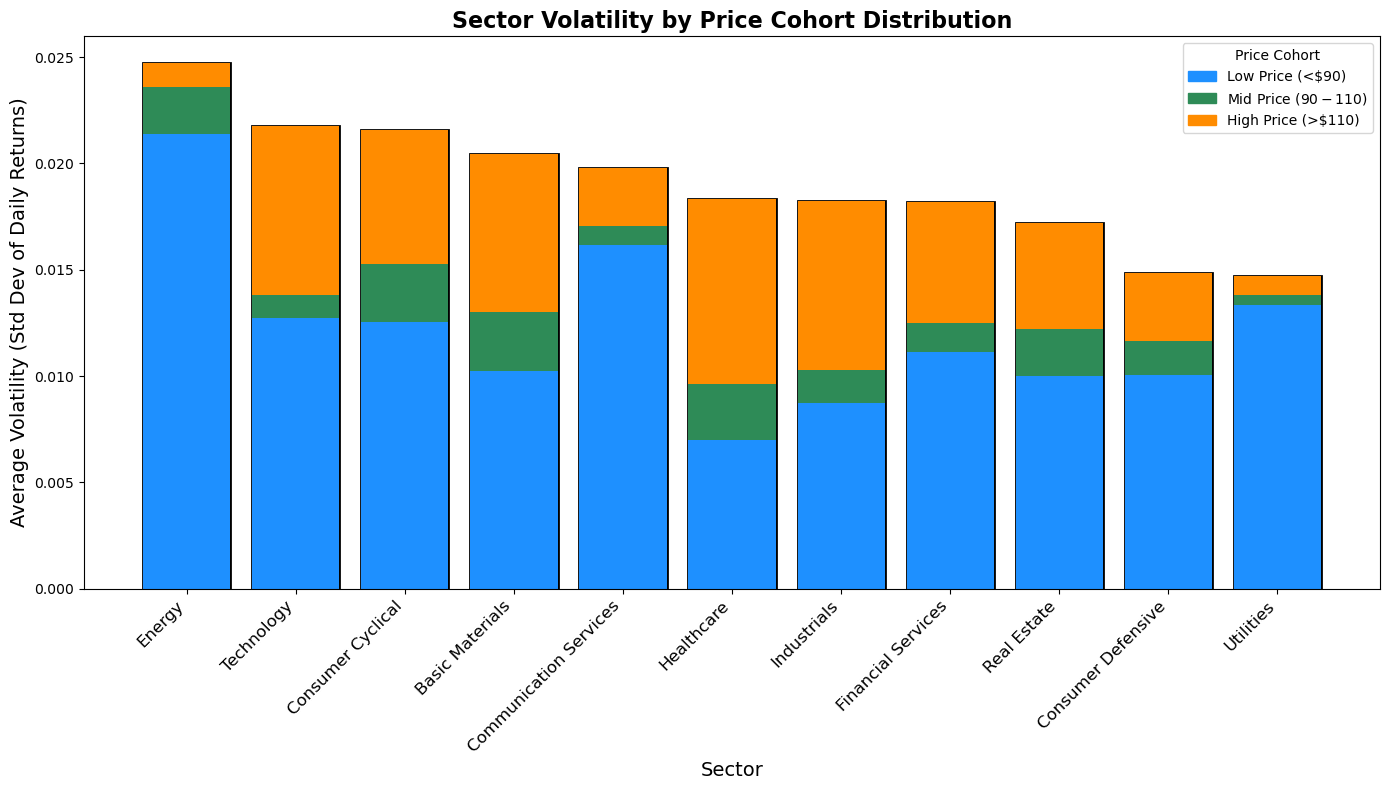

In [91]:
# Step 1: Calculating the daily returns (percentage change) for each stock
cleaned_stocks_data["Daily Return"] = cleaned_stocks_data.groupby("Symbol")["Close"].pct_change()

# Step 2: Calculating the volatility (standard deviation of daily returns) for each stock
volatility = cleaned_stocks_data.groupby("Symbol")["Daily Return"].std().dropna()

# Step 3: Merging volatility with sector information and closing price cohort categories
# Basically re-using the price-based cohorts from the original cohort classification based on closing price
avg_close_prices = cleaned_stocks_data.groupby("Symbol")["Close"].mean()

# Defining the price-based cohorts
low_price_symbols = avg_close_prices[avg_close_prices < 90].index
mid_price_symbols = avg_close_prices[(avg_close_prices >= 90) & (avg_close_prices <= 110)].index
high_price_symbols = avg_close_prices[avg_close_prices > 110].index

# Creating a DataFrame for categorization by price
price_category_df = pd.DataFrame({
    "Symbol": avg_close_prices.index,
    "Price Category": pd.cut(
        avg_close_prices,
        bins=[-np.inf, 90, 110, np.inf],
        labels=["Low", "Mid", "High"]
    )
}).reset_index(drop=True)

# Step 4: Merging price category and sector information with the volatility data
volatility_df = pd.DataFrame({"Symbol": volatility.index, "Volatility": volatility}).reset_index(drop=True)
merged_data = pd.merge(volatility_df, companies_data[["Symbol", "Sector"]], on="Symbol")
merged_data = pd.merge(merged_data, price_category_df, on="Symbol")

# Step 5: Calculating the total count of companies in each sector and each price category
sector_counts = merged_data.groupby("Sector")["Symbol"].count()
low_sector_counts = merged_data[merged_data["Price Category"] == "Low"].groupby("Sector")["Symbol"].count()
mid_sector_counts = merged_data[merged_data["Price Category"] == "Mid"].groupby("Sector")["Symbol"].count()
high_sector_counts = merged_data[merged_data["Price Category"] == "High"].groupby("Sector")["Symbol"].count()

# Calculating the percentage of each price category in each sector
low_sector_percent = (low_sector_counts / sector_counts * 100).fillna(0)
mid_sector_percent = (mid_sector_counts / sector_counts * 100).fillna(0)
high_sector_percent = (high_sector_counts / sector_counts * 100).fillna(0)

# Step 6: Calculating the mean volatility by sector for ordering purposes
sector_avg_volatility = merged_data.groupby("Sector")["Volatility"].mean().sort_values(ascending=False)

# Step 7: Plotting the bar chart with stacked sections representing each price category
plt.figure(figsize=(14, 8))

# Plotting the base bar for the total average volatility by sector
bars = plt.bar(sector_avg_volatility.index, sector_avg_volatility.values, color="black", edgecolor="black", linewidth=2)

# Adding the cohort distribution as color highlights within the bars
for i, sector in enumerate(sector_avg_volatility.index):
    # Plotting the low price section (blue) as a proportion of the total average volatility
    plt.bar(sector, sector_avg_volatility.values[i] * (low_sector_percent[sector] / 100), color="dodgerblue")
    
    # Plotting the mid price section (green) stacked on top of the low section
    plt.bar(sector, sector_avg_volatility.values[i] * (mid_sector_percent[sector] / 100),
            bottom=sector_avg_volatility.values[i] * (low_sector_percent[sector] / 100), color="seagreen")
    
    # Plotting the high price section (orange) stacked on top of the mid section
    plt.bar(sector, sector_avg_volatility.values[i] * (high_sector_percent[sector] / 100),
            bottom=sector_avg_volatility.values[i] * ((low_sector_percent[sector] + mid_sector_percent[sector]) / 100), color="darkorange")

# Step 8: Customizing the plot
plt.title("Sector Volatility by Price Cohort Distribution", fontsize=16, fontweight="bold")
plt.ylabel("Average Volatility (Std Dev of Daily Returns)", fontsize=14)
plt.xlabel("Sector", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Manually setting the legend with the correct colors for the price categories
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color="dodgerblue", label="Low Price (<$90)"),
    plt.Rectangle((0,0),1,1, color="seagreen", label="Mid Price ($90-$110)"),
    plt.Rectangle((0,0),1,1, color="darkorange", label="High Price (>$110)")
], title="Price Cohort", loc="upper right")

plt.tight_layout()

# Saving the plot as an HD JPEG in the working directory
plt.savefig("sector_volatility_price_cohort.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()


##### Volatility Analysis by Sector & Distribution of Volatility within Sectors

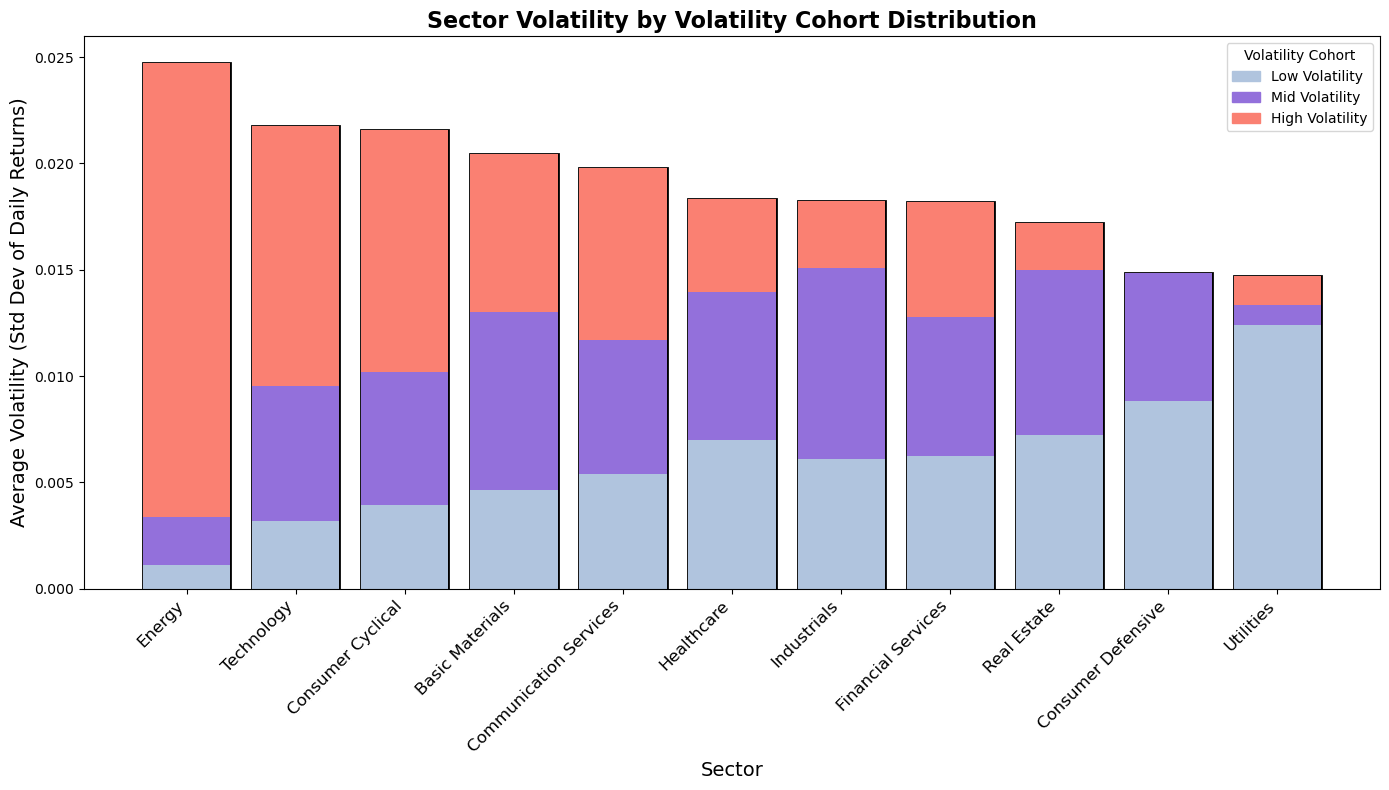

In [92]:
# Step 1: Calculate daily returns (percentage change) for each stock
cleaned_stocks_data["Daily Return"] = cleaned_stocks_data.groupby("Symbol")["Close"].pct_change()

# Step 2: Calculate volatility (standard deviation of daily returns) for each stock
volatility = cleaned_stocks_data.groupby("Symbol")["Daily Return"].std().dropna()

# Step 3: Define thresholds for low, mid, and high volatility
low_vol_threshold = volatility.quantile(0.33)
high_vol_threshold = volatility.quantile(0.67)

# Step 4: Classify each stock into Low, Mid, and High volatility categories
volatility_category = pd.cut(
    volatility,
    bins=[-np.inf, low_vol_threshold, high_vol_threshold, np.inf],
    labels=["Low", "Mid", "High"]
)

# Step 5: Create a DataFrame for volatility categories
volatility_df = pd.DataFrame({"Symbol": volatility.index, "Volatility Category": volatility_category}).reset_index(drop=True)

# Step 6: Merge volatility categories with sector information
merged_data = pd.merge(volatility_df, companies_data[["Symbol", "Sector"]], on="Symbol")

# Step 7: Calculate the total count of companies in each sector and each volatility category
sector_counts = merged_data.groupby("Sector")["Symbol"].count()
low_sector_counts = merged_data[merged_data["Volatility Category"] == "Low"].groupby("Sector")["Symbol"].count()
mid_sector_counts = merged_data[merged_data["Volatility Category"] == "Mid"].groupby("Sector")["Symbol"].count()
high_sector_counts = merged_data[merged_data["Volatility Category"] == "High"].groupby("Sector")["Symbol"].count()

# Calculate the percentage of each volatility category in each sector
low_sector_percent = (low_sector_counts / sector_counts * 100).fillna(0)
mid_sector_percent = (mid_sector_counts / sector_counts * 100).fillna(0)
high_sector_percent = (high_sector_counts / sector_counts * 100).fillna(0)

# Step 8: Calculate the mean volatility by sector for ordering purposes
sector_avg_volatility = merged_data.groupby("Sector").apply(
    lambda x: volatility[x["Symbol"]].mean()
).sort_values(ascending=False)

# Step 9: Plot the bar chart with stacked sections representing each volatility category
plt.figure(figsize=(14, 8))

# Plot the base bar for the total average volatility by sector
bars = plt.bar(sector_avg_volatility.index, sector_avg_volatility.values, color="black", edgecolor="black", linewidth=2)

# Adding the cohort distribution as color highlights within the bars
for i, sector in enumerate(sector_avg_volatility.index):
    # Plotting the low volatility section (light blue) as a proportion of the total average volatility
    plt.bar(sector, sector_avg_volatility.values[i] * (low_sector_percent[sector] / 100), color="lightsteelblue")
    
    # Plotting the mid volatility section (medium purple) stacked on top of the low section
    plt.bar(sector, sector_avg_volatility.values[i] * (mid_sector_percent[sector] / 100),
            bottom=sector_avg_volatility.values[i] * (low_sector_percent[sector] / 100), color="mediumpurple")
    
    # Plotting the high volatility section (salmon) stacked on top of the mid section
    plt.bar(sector, sector_avg_volatility.values[i] * (high_sector_percent[sector] / 100),
            bottom=sector_avg_volatility.values[i] * ((low_sector_percent[sector] + mid_sector_percent[sector]) / 100), color="salmon")

# Step 10: Customize the plot
plt.title("Sector Volatility by Volatility Cohort Distribution", fontsize=16, fontweight="bold")
plt.ylabel("Average Volatility (Std Dev of Daily Returns)", fontsize=14)
plt.xlabel("Sector", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Manually setting the legend with the correct colors for volatility categories
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color="lightsteelblue", label="Low Volatility"),
    plt.Rectangle((0,0),1,1, color="mediumpurple", label="Mid Volatility"),
    plt.Rectangle((0,0),1,1, color="salmon", label="High Volatility")
], title="Volatility Cohort", loc="upper right")

plt.tight_layout()

# Saving the plot as an HD JPEG for the working directory
plt.savefig("sector_volatility_cohort.jpg", format="jpeg", dpi=300, bbox_inches="tight")

plt.show()


In this section, I explored sector-wise data from multiple angles to identify patterns in stock performance and volatility. I started by examining the distribution of closing prices across sectors, followed by an analysis of sector-based volatility. To further refine the insights, I segmented volatility into cohorts, observing how it interacts with price distributions. The goal was to determine which sectors offer the most favorable balance between price stability and risk, helping to pinpoint strategic investment opportunities.

The visualizations illustrate key findings: some sectors exhibit higher price brackets with lower volatility, making them relatively stable investment choices, while others show greater price fluctuations, indicating higher potential returns but also increased risk. By layering these perspectives, I was able to form a clearer picture of how sector classifications influence stock behavior, allowing anyone observing this data to make an informed decision when selecting a final investment strategy to backtest.

## Section 4 - Backtesting Chosen Strategy

Building on insights from the earlier data analysis, I identified the Healthcare sector as an attractive candidate for further exploration. Its moderate price volatility and balanced representation across different price cohorts suggested potential for stable and consistent returns. Additionally, the sector's resilience during market fluctuations, highlighted in the volatility analysis, reinforced its appeal for backtesting.

With these findings, I designed a strategy to evaluate a portfolio of healthcare stocks against the S&P 500 index, focusing on long-term performance and risk-adjusted returns from 2010 to 2024. To ensure a robust evaluation, I incorporated 1,000 iterations of random sampling, allowing me to rigorously assess the sector's investment potential under varying conditions.

In [93]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Setting up the parameters for backtesting
iterations = 1000
initial_investment = 1000000  # Initial investment amount of 1 Million
start_date = "2010-01-01"
end_date = "2024-12-31"

# Filtering the data to match the date range from 2010 to 2024
cleaned_stocks_data = cleaned_stocks_data[(cleaned_stocks_data["Date"] >= start_date) & (cleaned_stocks_data["Date"] <= end_date)]
cleaned_index_data = cleaned_index_data[(cleaned_index_data["Date"] >= start_date) & (cleaned_index_data["Date"] <= end_date)]
cleaned_index_data.set_index("Date", inplace=True)

# Defining healthcare symbols based on the companies_data DataFrame
healthcare_symbols = companies_data[companies_data["Sector"] == "Healthcare"]["Symbol"].unique()

# Calculating daily returns for S&P 500 index
cleaned_index_data["SP500 Daily Return"] = cleaned_index_data["S&P500"].pct_change()

# Initializing lists to store cumulative returns and metrics for each strategy
healthcare_cumulative_returns_list = []
sp500_cumulative_returns_list = []
healthcare_beats_sp500_count = 0  # Counter for outperforming S&P 500

# Tracking underperformance and outperformance metrics
losing_iterations_final_value_diffs = []
winning_iterations_final_value_diffs = []

# Setting up a function to calculate additional financial metrics
def calculate_metrics(cumulative_returns, initial_investment, periods):
    ending_value = cumulative_returns.iloc[-1]
    cagr = (ending_value / initial_investment)**(1/periods) - 1
    daily_returns = cumulative_returns.pct_change().dropna()
    sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
    downside_returns = daily_returns[daily_returns < 0]
    sortino_ratio = daily_returns.mean() / downside_returns.std() * np.sqrt(252) if not downside_returns.empty else np.nan
    max_drawdown = ((cumulative_returns / cumulative_returns.cummax()) - 1).min()
    volatility = daily_returns.std() * np.sqrt(252)
    calmar_ratio = cagr / abs(max_drawdown) if max_drawdown != 0 else np.nan
    return cagr, sharpe_ratio, sortino_ratio, max_drawdown, volatility, calmar_ratio

# Looping the backtest over 1000 iterations (trying to be merciful to my humble laptop)
for i in range(iterations):
    # Randomly selecting a subset of healthcare stocks for the portfolio
    selected_healthcare_symbols = np.random.choice(healthcare_symbols, size=5, replace=False)
    
    # Calculating daily returns for the healthcare portfolio (average daily return of selected stocks)
    healthcare_data = cleaned_stocks_data[cleaned_stocks_data["Symbol"].isin(selected_healthcare_symbols)]
    healthcare_data = healthcare_data.pivot(index="Date", columns="Symbol", values="Close").reindex(cleaned_index_data.index).fillna(method="ffill")
    healthcare_daily_returns = healthcare_data.pct_change().mean(axis=1)
    
    # Calculating cumulative returns for each strategy
    healthcare_cumulative_return = (1 + healthcare_daily_returns).cumprod() * initial_investment
    sp500_cumulative_return = (1 + cleaned_index_data["SP500 Daily Return"]).cumprod() * initial_investment

    # Aligning cumulative returns to ensure date consistency
    healthcare_cumulative_return = healthcare_cumulative_return.reindex(cleaned_index_data.index).fillna(method="ffill")
    sp500_cumulative_return = sp500_cumulative_return.reindex(cleaned_index_data.index).fillna(method="ffill")

    # Storing cumulative returns for averaging later
    healthcare_cumulative_returns_list.append(healthcare_cumulative_return)
    sp500_cumulative_returns_list.append(sp500_cumulative_return)

    # Checking if the Healthcare Portfolio outperformed S&P 500
    if healthcare_cumulative_return.iloc[-1] > sp500_cumulative_return.iloc[-1]:
        healthcare_beats_sp500_count += 1
        winning_iterations_final_value_diffs.append(healthcare_cumulative_return.iloc[-1] - sp500_cumulative_return.iloc[-1])
    else:
        losing_iterations_final_value_diffs.append(healthcare_cumulative_return.iloc[-1] - sp500_cumulative_return.iloc[-1])

# Averaging cumulative returns over 1000 iterations
healthcare_avg_cumulative_return = pd.concat(healthcare_cumulative_returns_list, axis=1).mean(axis=1)
sp500_avg_cumulative_return = pd.concat(sp500_cumulative_returns_list, axis=1).mean(axis=1)

# Calculating metrics for each strategy
periods = len(healthcare_avg_cumulative_return) / 252  # Approximate years

# Healthcare Portfolio metrics
healthcare_cagr, healthcare_sharpe, healthcare_sortino, healthcare_max_drawdown, healthcare_volatility, healthcare_calmar = \
    calculate_metrics(healthcare_avg_cumulative_return, initial_investment, periods)

# S&P 500 metrics
sp500_cagr, sp500_sharpe, sp500_sortino, sp500_max_drawdown, sp500_volatility, sp500_calmar = \
    calculate_metrics(sp500_avg_cumulative_return, initial_investment, periods)

# Calculating an outperformance percentage (healthcare portfolio vs S&P500)
outperformance_percentage = (healthcare_beats_sp500_count / iterations) * 100

# Calculating the average underperformance and outperformance in losing and winning cases
average_underperformance_final_value = np.mean(losing_iterations_final_value_diffs) if losing_iterations_final_value_diffs else 0
average_outperformance_final_value = np.mean(winning_iterations_final_value_diffs) if winning_iterations_final_value_diffs else 0

# Printing the average performance metrics, outperformance percentage, and performance comparison
print(f"Average Performance Metrics Over 1000 Iterations:\n")
print("Healthcare Portfolio:")
print(f" - CAGR: {healthcare_cagr:.2%}")
print(f" - Sharpe Ratio: {healthcare_sharpe:.2f}")
print(f" - Sortino Ratio: {healthcare_sortino:.2f}")
print(f" - Max Drawdown: {healthcare_max_drawdown:.2%}")
print(f" - Volatility: {healthcare_volatility:.2%}")
print(f" - Calmar Ratio: {healthcare_calmar:.2f}")

print("\nS&P 500:")
print(f" - CAGR: {sp500_cagr:.2%}")
print(f" - Sharpe Ratio: {sp500_sharpe:.2f}")
print(f" - Sortino Ratio: {sp500_sortino:.2f}")
print(f" - Max Drawdown: {sp500_max_drawdown:.2%}")
print(f" - Volatility: {sp500_volatility:.2%}")
print(f" - Calmar Ratio: {sp500_calmar:.2f}")

print(f"\nThe Healthcare Portfolio beat the S&P 500 {outperformance_percentage:.0f}% of the time throughout 1000 loops.")

# Contextualizing the losses and wins
print(f"\nWhen the Healthcare Portfolio underperformed, it lost by an average of {average_underperformance_final_value / sp500_avg_cumulative_return.iloc[-1]:.2%} of the S&P 500’s average final portfolio value.")
print(f"\nWhen the Healthcare Portfolio outperformed, it won by an average of {average_outperformance_final_value / sp500_avg_cumulative_return.iloc[-1]:.2%} of the S&P 500’s average final portfolio value.")

# Creating an interactive plot for the average cumulative returns over time
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=healthcare_avg_cumulative_return.index, 
    y=healthcare_avg_cumulative_return, 
    mode='lines',
    name="Healthcare Portfolio",
    line=dict(color="#FF69B4")
))

fig.add_trace(go.Scatter(
    x=sp500_avg_cumulative_return.index, 
    y=sp500_avg_cumulative_return, 
    mode='lines',
    name="S&P 500",
    line=dict(color="black")
))

fig.update_layout(
    title="Average Cumulative Returns Over Time (1000 Iterations)",
    xaxis_title="Date",
    yaxis_title="Portfolio Value ($)",
    legend_title="Portfolio",
    template="plotly_white",
    hovermode="x unified"
)

fig.show()

# Saving the interactive plot as an HTML file in the working directory
fig.write_html("interactive_backtest_plot.html")


Average Performance Metrics Over 1000 Iterations:

Healthcare Portfolio:
 - CAGR: 13.26%
 - Sharpe Ratio: 0.80
 - Sortino Ratio: 1.06
 - Max Drawdown: -29.24%
 - Volatility: 17.62%
 - Calmar Ratio: 0.45

S&P 500:
 - CAGR: 11.26%
 - Sharpe Ratio: 0.70
 - Sortino Ratio: 0.85
 - Max Drawdown: -33.92%
 - Volatility: 17.85%
 - Calmar Ratio: 0.33

The Healthcare Portfolio beat the S&P 500 62% of the time throughout 1000 loops.

When the Healthcare Portfolio underperformed, it lost by an average of -21.58% of the S&P 500’s average final portfolio value.

When the Healthcare Portfolio outperformed, it won by an average of 44.65% of the S&P 500’s average final portfolio value.


## Section 5 - Conclusion

The results of my analysis and chosen strategy exceeded my expectations. The healthcare portfolio achieved a Compound Annual Growth Rate (CAGR) of ~13%, outperforming the S&P 500's ~11%. While this strategy may not deliver massive returns, it offers stability and reliable performance over the long term.

With higher Sharpe and Sortino ratios, the portfolio demonstrated superior risk-adjusted results, reinforcing its consistency and resilience. Notably, the healthcare portfolio **outperformed the S&P 500 in ~60% of iterations**—a strong result, given that the S&P 500 is widely regarded as a solid benchmark. Even more compelling, when the strategy underperformed (~40% of iterations), it only did so by an average of ~20%, whereas in winning cases it **outperformed by ~40%.** This means that adopting this strategy offers a higher probability of beating the market, and even in the rare cases where it lags, the losses remain relatively modest. Many strategies that beat the S&P 500 come with severe drawdowns when they fail—this approach provides a balance of higher returns with controlled downside risk.

By effectively replicating and slightly improving upon this benchmark such as through the use of machine learning models, my analysis underscores healthcare as a steady and strategic sector for investment. But more importantly, this outcome validates the potential of a data science driven approach to portfolio design, showcasing how insights from exploratory and deeper analysis can guide successful investment strategies.